In [21]:
import time

# Импорт данных и моделей
from models.first_task import X_train, y_train  # Тренировочные данные
from models.second_task.GradientDescentClassifier import GradientDescentClassifier  # Классификатор на основе градиентного спуска
from models.second_task.SVM import SVM  # Метод опорных векторов (SVM)

# Функция для измерения среднего времени выполнения одной итерации обучения модели
def measure_time_per_iteration(model, X, y, num_iterations=10):
    """
    Замеряет среднее время обучения модели за одну итерацию.
    
    :param model: Обучаемая модель (например, градиентный спуск или SVM)
    :param X: Признаки тренировочного набора
    :param y: Метки классов тренировочного набора
    :param num_iterations: Количество итераций для замера времени
    :return: Среднее время одной итерации обучения
    """
    start_time = time.time()  # Запоминаем начальное время
    for _ in range(num_iterations):  # Выполняем обучение num_iterations раз
        model.fit(X, y)  # Запуск обучения модели
    end_time = time.time()  # Запоминаем конечное время
    return (end_time - start_time) / num_iterations  # Среднее время на одну итерацию

# Создание модели линейной классификации с градиентным спуском
# Параметр epochs=1 задаёт одну итерацию обучения
classifier = GradientDescentClassifier(learning_rate=0.01, epochs=1)

# Создание модели SVM с линейным ядром
# SVM настраивается на выполнение одной итерации (например, одного шага SMO)
svm_model = SVM(C=1.0, kernel="linear")

# Замер времени выполнения одной итерации для каждой модели
grad_desc_time = measure_time_per_iteration(classifier, X_train, y_train)  # Для градиентного спуска
svm_time = measure_time_per_iteration(svm_model, X_train, y_train)  # Для метода опорных векторов

# Вывод времени выполнения на экран
print(grad_desc_time)  # Среднее время одной итерации для градиентного спуска
print(svm_time)  # Среднее время одной итерации для SVM

0.0005450010299682617
9.298324584960937e-07


Best Parameters: {'epochs': 100, 'lambda1': 0.0001, 'lambda2': 0.0001, 'learning_rate': 0.01}
Best Model Coefficients: [0.31311995 0.30786036 0.17759146 0.19729017 0.         0.11242853
 0.15592546 0.10642865 0.         0.         0.         0.
 0.         0.         0.         0.         0.00323417 0.00153422
 0.         0.         0.00323417 0.00173421 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00170087 0.00223419 0.00260085 0.00186753 0.00206753
 0.00186753 0.00350074 0.02589941 0.01813308 0.00190087 0.00260085
 0.00180087 0.         0.         0.         0.00323417 0.
 0.         0.00256751 0.         0.         0.00263418 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         

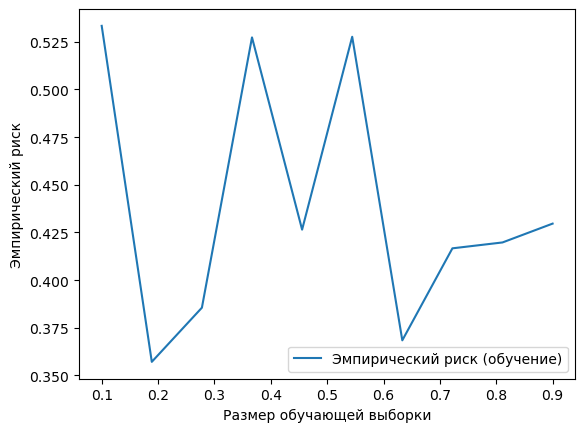

In [22]:
from sklearn.model_selection import GridSearchCV  # Для поиска по сетке гиперпараметров
from sklearn.metrics import make_scorer, accuracy_score  # Метрики для оценки модели
from sklearn.impute import SimpleImputer  # Для обработки пропущенных значений

from models.first_task import X_train, y_train  # Тренировочные данные
from models.second_task.GradientDescentClassifier import GradientDescentClassifier  # Классификатор на основе градиентного спуска

# Импутация пропущенных значений (замена на среднее значение в столбце)
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)  # Заполнение пропущенных значений в данных

# Сетка гиперпараметров для поиска оптимальных значений
param_grid = {
    'learning_rate': [0.01, 0.1, 1.0],  # Возможные значения скорости обучения
    'lambda1': [0.0001, 0.01, 0.1],     # Коэффициенты для L1-регуляризации
    'lambda2': [0.0001, 0.01, 0.1],     # Коэффициенты для L2-регуляризации
    'epochs': [100, 500, 1000]          # Количество эпох обучения
}

# Инициализация классификатора
classifier = GradientDescentClassifier()

# Поиск по сетке гиперпараметров с использованием перекрёстной проверки
grid_search = GridSearchCV(classifier, param_grid, scoring=make_scorer(accuracy_score))
grid_search.fit(X_train_imputed, y_train)  # Обучение модели и подбор гиперпараметров

# Получение лучших гиперпараметров и лучшей модели
best_params = grid_search.best_params_  # Оптимальные значения гиперпараметров
best_model = grid_search.best_estimator_  # Лучшая модель

# Вывод результатов
print("Best Parameters:", best_params)  # Лучшая комбинация гиперпараметров
print("Best Model Coefficients:", best_model.coef_)  # Коэффициенты лучшей модели

# Построение кривой обучения
import matplotlib.pyplot as plt
from sklearn.metrics import hinge_loss  # Метрика эмпирического риска для классификации
from sklearn.model_selection import train_test_split  # Разделение данных
import numpy as np

# Импутация пропущенных значений
X_train_imputed = imputer.fit_transform(X_train)

# Определение долей обучающей выборки для построения кривой
train_sizes = np.linspace(0.1, 0.9, 10)  # Доли данных от 10% до 90%
empirical_risks = []  # Список для хранения значений эмпирического риска

# Обучение модели и вычисление эмпирического риска для различных размеров обучающей выборки
for train_size in train_sizes:
    print(f"Current train size: {train_size}")  # Информация о текущем размере обучающей выборки
    X_partial, _, y_partial, _ = train_test_split(X_train_imputed, y_train, train_size=train_size)  # Частичное разделение данных
    best_model.fit(X_partial, y_partial)  # Обучение лучшей модели на текущем подмножестве данных

    try:
        predictions = best_model.predict(X_partial)  # Предсказания на текущем подмножестве данных
        risk = hinge_loss(y_partial, predictions)  # Вычисление эмпирического риска (hinge loss)
        empirical_risks.append(risk)  # Сохранение значения риска
    except ValueError:
        # Если возникают ошибки из-за NaN, пропускаем текущую итерацию
        print(f"Warning: NaNs encountered for training size {train_size}. Skipping...")
        empirical_risks.append(np.nan)

# Построение графика эмпирического риска
plt.plot(train_sizes, empirical_risks, label="Эмпирический риск (обучение)")  # Линия эмпирического риска
plt.xlabel("Размер обучающей выборки")  # Подпись оси X
plt.ylabel("Эмпирический риск")  # Подпись оси Y
plt.legend()  # Легенда графика
plt.show()  # Отображение графика

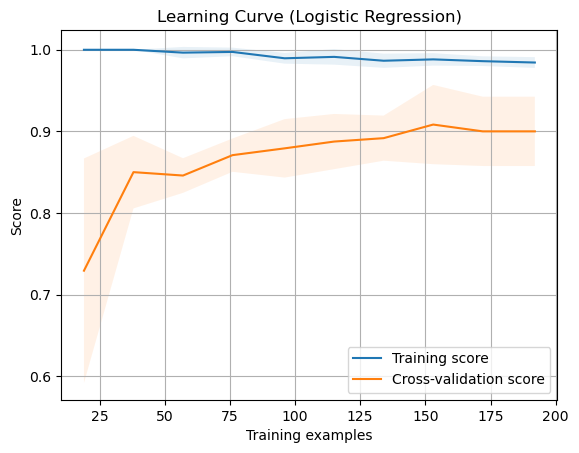

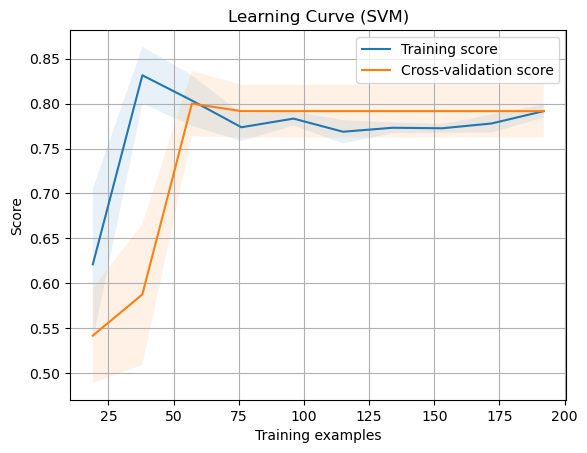

Accuracy: 0.7916666666666666


In [17]:
from sklearn.model_selection import train_test_split  # Разделение данных на обучающую и тестовую выборки
from sklearn.linear_model import LogisticRegression  # Логистическая регрессия
from sklearn.svm import SVC  # Метод опорных векторов (SVM)
from sklearn.metrics import accuracy_score  # Метрика точности
from sklearn.base import clone  # Клонирование моделей для повторного использования

from models.first_task import X_train, y_train  # Тренировочные данные

# Разделение исходных данных на обучающую (80%) и тестовую (20%) выборки
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Список моделей для анализа
models = [
    ('Logistic Regression', LogisticRegression()),  # Логистическая регрессия
    ('SVM', SVC())  # Метод опорных векторов
]

# Функция для создания конвейера обработки данных и модели
def build_pipeline(model):
    """
    Создаёт конвейер обработки данных и обучения модели.
    
    :param model: Модель классификации
    :return: Конвейер обработки данных и обучения
    """
    imputer = SimpleImputer(strategy='mean')  # Заполнение пропущенных значений средним
    steps = [
        ('imputer', imputer),  # Этап заполнения пропущенных значений
        ('scaler', MaxAbsScaler()),  # Масштабирование данных
        ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),  # Кодирование категориальных признаков
        ('model', model)  # Обучаемая модель
    ]
    pipeline = Pipeline(steps=steps)  # Объединение этапов в конвейер
    return pipeline

# Функция для построения кривой обучения
def plot_learning_curve(pipeline, X, y, title):
    """
    Строит кривую обучения для переданного конвейера.
    
    :param pipeline: Конвейер обработки данных и обучения
    :param X: Признаки данных
    :param y: Метки данных
    :param title: Заголовок графика
    """
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )  # Вычисление обучающих и тестовых ошибок на различных размерах обучающей выборки

    # Средние и стандартные отклонения для обучающих оценок
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    # Средние и стандартные отклонения для тестовых оценок
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Построение кривых для обучающей и тестовой выборки
    plt.plot(train_sizes, train_mean, label='Оценка на обучении')  # Линия для обучающей выборки
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)  # Интервал уверенности
    plt.plot(train_sizes, test_mean, label='Оценка на кросс-валидации')  # Линия для тестовой выборки
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)  # Интервал уверенности

    # Настройка графика
    plt.title(title)  # Заголовок графика
    plt.xlabel('Количество обучающих примеров')  # Подпись оси X
    plt.ylabel('Точность')  # Подпись оси Y
    plt.legend(loc="best")  # Легенда
    plt.grid()  # Сетка
    plt.show()  # Показ графика

# Цикл для построения кривых обучения для каждой модели
for name, model in models:
    pipeline = build_pipeline(clone(model))  # Создание конвейера для текущей модели

    X_train_dense = X_train.toarray()  # Преобразование разреженной матрицы в плотную

    pipeline.fit(X_train_dense, y_train)  # Обучение модели на данных
    plot_learning_curve(pipeline, X_train_dense, y_train, f'Кривая обучения ({name})')  # Построение кривой обучения

# Вывод точности на обучающей выборке
print(f"Accuracy: {accuracy_score(pipeline.predict(X_train_dense), y_train)}")  # Точность на обучающей выборке

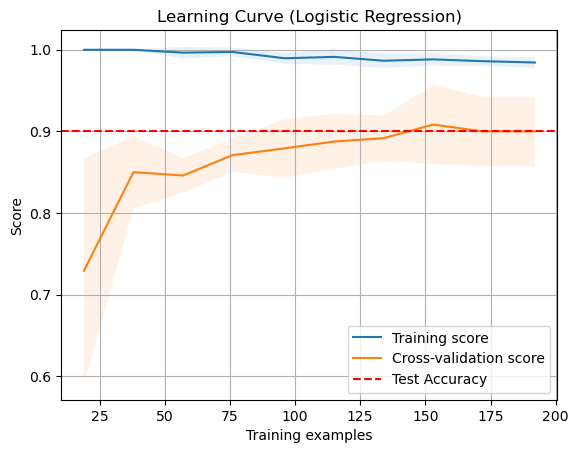

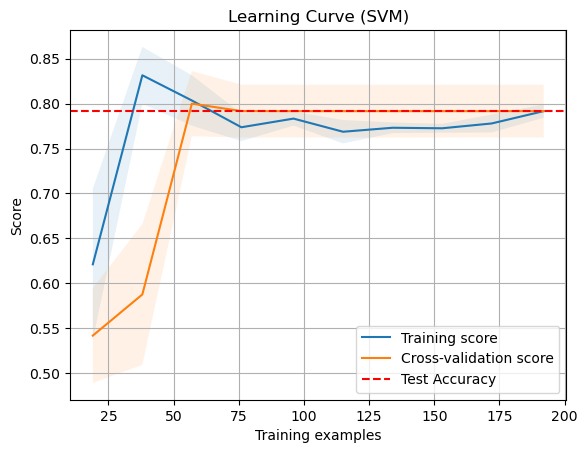

Accuracy: 0.7916666666666666


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.base import clone
import matplotlib.pyplot as plt

from models.first_task import X_train, y_train

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM', SVC())
]

def build_pipeline(model):
  imputer = SimpleImputer(strategy='mean')

  steps = [('imputer', imputer), ('scaler', MaxAbsScaler()),
          ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
          ('model', model)]
  pipeline = Pipeline(steps=steps)
  return pipeline

def plot_learning_curve(pipeline, X, y, title):
  train_sizes, train_scores, test_scores = learning_curve(
      pipeline, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
  )
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  last_test_score = test_mean[-1]

  plt.plot(train_sizes, train_mean, label='Training score')
  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
  plt.plot(train_sizes, test_mean, label='Cross-validation score')
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

  plt.axhline(y=last_test_score, color='red', linestyle='--', label='Test Accuracy')

  plt.title(title)
  plt.xlabel('Training examples')
  plt.ylabel('Score')
  plt.legend(loc="best")
  plt.grid()
  plt.show()

for name, model in models:
  pipeline = build_pipeline(clone(model))

  X_train_dense = X_train.toarray()

  pipeline.fit(X_train_dense, y_train)
  plot_learning_curve(pipeline, X_train_dense, y_train, f'Learning Curve ({name})')

print(f"Accuracy: {accuracy_score(pipeline.predict(X_train_dense), y_train)}")